In [2]:
# 🧠 Titanic Survival Prediction Using Random Forest
# This notebook loads a custom Titanic dataset and uses the Random Forest Classifier to predict survival outcomes.
# It includes preprocessing, training, evaluation, and feature importance visualization.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Style
sns.set(style='whitegrid')


In [3]:
# Load Titanic dataset
df = pd.read_csv("titanic_custom_3000x24_generated.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Deck,FarePerPerson,HasCabin,AgeBin,FareBin,NameLength,CabinKnown,SexBinary,Embarked_C
0,1,0,2,John Doe,female,34.997376,2,0,A/5 21171,71.726904,...,Mr,C,23.908968,1,2,3,8,1,0,0
1,2,1,2,John Doe,female,14.074482,1,2,A/5 21171,11.609064,...,Mr,C,2.902266,1,1,0,8,1,0,0
2,3,0,1,John Doe,female,56.821726,0,2,A/5 21171,29.460960,...,Mr,G,9.820320,1,3,1,8,1,0,1
3,4,0,1,John Doe,female,43.292474,1,0,A/5 21171,16.253199,...,Mr,E,8.126599,1,3,0,8,1,0,0
4,5,0,2,John Doe,male,51.190544,3,2,A/5 21171,61.334749,...,Mr,E,10.222458,1,3,2,8,1,1,0


In [10]:
# Drop irrelevant or redundant columns
df_model = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin", "Deck", "Title"])

# Convert categorical variables into dummy/indicator variables
df_model = pd.get_dummies(df_model, drop_first=True)

# Split into features and target
X = df_model.drop("Survived", axis=1)
y = df_model["Survived"]
print(X.head())
print(y.head())


   Pclass        Age  SibSp  Parch       Fare  FamilySize  IsAlone  \
0       2  34.997376      2      0  71.726904           3        0   
1       2  14.074482      1      2  11.609064           4        0   
2       1  56.821726      0      2  29.460960           3        0   
3       1  43.292474      1      0  16.253199           2        0   
4       2  51.190544      3      2  61.334749           6        0   

   FarePerPerson  HasCabin  AgeBin  FareBin  NameLength  CabinKnown  \
0      23.908968         1       2        3           8           1   
1       2.902266         1       1        0           8           1   
2       9.820320         1       3        1           8           1   
3       8.126599         1       3        0           8           1   
4      10.222458         1       3        2           8           1   

   SexBinary  Embarked_C  Sex_male  Embarked_Q  Embarked_S  
0          0           0     False        True       False  
1          0           0     F

In [11]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2400, 18)
(600, 18)
(2400,)
(600,)


In [6]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.4567\n
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.47      0.47       315
           1       0.43      0.45      0.44       285

    accuracy                           0.46       600
   macro avg       0.46      0.46      0.46       600
weighted avg       0.46      0.46      0.46       600

Confusion Matrix:


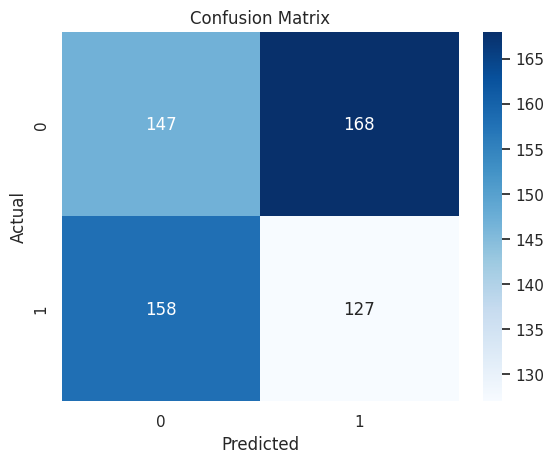

In [7]:
# Predict on test data
y_pred = rf_model.predict(X_test)

# Accuracy and reports
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


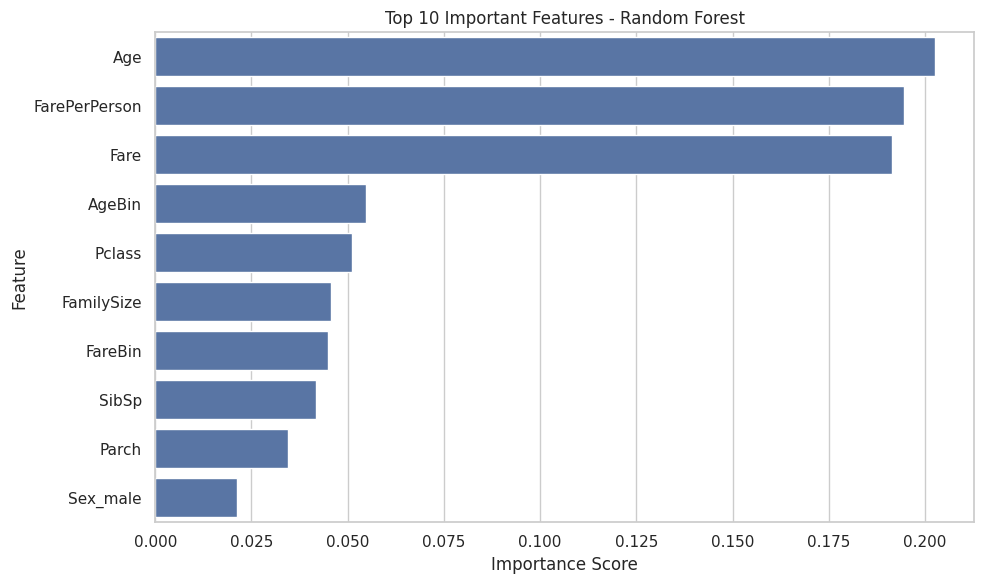

In [8]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
